In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [24]:
df = pd.read_csv("RBIDATA.csv")

In [25]:
df.head()

,Date,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
0,Jan2025,BANK OF BARODA,8504.0,2411.0,63510.0,120380330.0
1,Jan2025,BANK OF INDIA,5341.0,2895.0,29163.0,63783084.0
2,Jan2025,BANK OF MAHARASHTRA,2197.0,252.0,3709.0,29366539.0
3,Jan2025,CANARA BANK,8174.0,3794.0,560312.0,150843429.0
4,Jan2025,CENTRAL BANK OF INDIA,2857.0,1144.0,0.0,39560576.0


In [26]:
df["Date"] = pd.to_datetime(df["Date"], format="%b%Y").dt.strftime("%Y-%m-%d")
print(df.head())

         Date              Bank Name  Atm's on-site  Atm's off-site  \
0  2025-01-01         BANK OF BARODA         8504.0          2411.0   
1  2025-01-01          BANK OF INDIA         5341.0          2895.0   
2  2025-01-01    BANK OF MAHARASHTRA         2197.0           252.0   
3  2025-01-01            CANARA BANK         8174.0          3794.0   
4  2025-01-01  CENTRAL BANK OF INDIA         2857.0          1144.0   

   Credit card cash withdraw  Debit card cash withdraw  
0                    63510.0               120380330.0  
1                    29163.0                63783084.0  
2                     3709.0                29366539.0  
3                   560312.0               150843429.0  
4                        0.0                39560576.0  


In [27]:
df["Bank Name"].unique()

array(['BANK OF BARODA', 'BANK OF INDIA', 'BANK OF MAHARASHTRA',
       'CANARA BANK', 'CENTRAL BANK OF INDIA', 'INDIAN BANK',
       'INDIAN OVERSEAS BANK', 'PUNJAB AND SIND BANK',
       'PUNJAB NATIONAL BANK', 'STATE BANK OF INDIA', 'UCO BANK',
       'UNION BANK OF INDIA', 'AXIS BANK LTD', 'BANDHAN BANK LTD',
       'CITY UNION BANK', 'CSB BANK LTD', 'DCB BANK LTD',
       'DHANALAKSHMI BANK LTD', 'FEDERAL BANK LTD', 'HDFC BANK LTD',
       'ICICI BANK LTD', 'IDBI BANK LTD', 'IDFC FIRST BANK LTD',
       'INDUSIND BANK LTD', 'JAMMU AND KASHMIR BANK LTD',
       'KARNATAKA BANK LTD', 'KARUR VYSYA BANK LTD',
       'KOTAK MAHINDRA BANK LTD', 'NAINITAL BANK LTD', 'RBL BANK LTD',
       'SOUTH INDIAN BANK', 'TAMILNAD MERCANTILE BANK LTD',
       'YES BANK LTD', 'IDFC Bank Limited', 'THE LAXMI VILAS BANK LTD',
       'ALLAHABAD BANK', 'ANDHRA BANK', 'CORPORATION BANK',
       'ORIENTAL BANK OF COMMERCE', 'SYNDICATE BANK',
       'UNITED BANK OF INDIA', 'DENA BANK', 'VIJAYA BANK',
      

#### Values in the column "Credit card cash withdraw", "Debit card cash withdraw" vary in 3 formats
1. Mar2022-Jan2025 are in 000's hence will convert it into lakhs by dividing it by 10 (value/10)
2. Jul2019-Feb2022 already in lakhs
3. Jan2017-Jun2019 are in millions hence will convert it into lakhs by multiplying it by 10 (value*10)

In [28]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
mar2022_jan2025 = df[(df["Date"] >= "2022-03-01") & (df["Date"] <= "2025-01-01")]
jul2019_feb2022 = df[(df["Date"] >= "2019-07-01") & (df["Date"] <= "2022-02-28")]
jan2017_jun2019 = df[(df["Date"] >= "2017-01-01") & (df["Date"] <= "2019-06-30")]

In [29]:
sample_mar2022_jan2025 = mar2022_jan2025[["Date", "Credit card cash withdraw", "Debit card cash withdraw"]].sample(2, random_state=42)
sample_jul2019_feb2022 = jul2019_feb2022[["Date", "Credit card cash withdraw", "Debit card cash withdraw"]].sample(2, random_state=42)
sample_jan2017_jun2019 = jan2017_jun2019[["Date", "Credit card cash withdraw", "Debit card cash withdraw"]].sample(2, random_state=42)

In [30]:
print("2 Random Values from Mar 2022 - Jan 2025 (in 000's):")
print(sample_mar2022_jan2025)
print("\n2 Random Values from Jul 2019 - Feb 2022 (in Lakhs):")
print(sample_jul2019_feb2022)
print("\n2 Random Values from Jan 2017 - Jun 2019 (in Rs Millions):")
print(sample_jan2017_jun2019)

2 Random Values from Mar 2022 - Jan 2025 (in 000's):
          Date  Credit card cash withdraw  Debit card cash withdraw
170 2024-08-01                    37830.0                95594989.0
535 2023-09-01                        0.0                 7170502.0

2 Random Values from Jul 2019 - Feb 2022 (in Lakhs):
           Date  Credit card cash withdraw  Debit card cash withdraw
1471 2021-05-01                       66.0                  168835.0
1880 2020-04-01                      285.0                  747614.0

2 Random Values from Jan 2017 - Jun 2019 (in Rs Millions):
           Date  Credit card cash withdraw  Debit card cash withdraw
2669 2018-08-01                        0.0                   23657.4
2513 2018-12-01                        4.1                   40911.4


In [31]:
def standardize_cash_withdrawals(df, column_name, date_column):
    """
    Converts the cash withdrawal values into a common unit (rupees lakh).

    Returns:
    pd.DataFrame: DataFrame with standardized values in rupees lakh.
    """
    
    df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")  

    # Convert '000’s' values (Jan 2025 - March 2022) to lakh
    df.loc[df[date_column] >= "2022-03-01", column_name] /= 10

    # Convert rupees million (June 2019 - Jan 2017) to lakh
    df.loc[df[date_column] <= "2019-06-30", column_name] *= 10

    return df

# Apply function to credit and debit card cash withdrawal columns
df = standardize_cash_withdrawals(df, "Credit card cash withdraw", "Date")
df = standardize_cash_withdrawals(df, "Debit card cash withdraw", "Date")

#### Lets look for Bank of baroda data

In [32]:
bobdf = df[df["Bank Name"] == "BANK OF BARODA"]
bobdf.head()

,Date,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
0,2025-01-01,BANK OF BARODA,8504.0,2411.0,6351.0,12038033.0
33,2024-12-01,BANK OF BARODA,8395.0,2383.0,6632.7,11804846.7
66,2024-11-01,BANK OF BARODA,8345.0,2343.0,6437.0,11100178.8
99,2024-10-01,BANK OF BARODA,8217.0,2256.0,6921.4,13525513.8
132,2024-09-01,BANK OF BARODA,8107.0,2253.0,6262.9,11219026.5


In [33]:
# Set "Date" as index and reverse the order
bobdf.set_index("Date", inplace=True)
bobdf = bobdf[::-1]  # Reverse the order
bobdf.head()

,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
Date,,,,,
2017-01-01,BANK OF BARODA,6287.0,4146.0,167.0,500905.0
2017-02-01,BANK OF BARODA,6276.0,4203.0,227.0,613155.0
2017-03-01,BANK OF BARODA,6296.0,4224.0,255.0,699271.0
2017-04-01,BANK OF BARODA,6307.0,4212.0,222.0,666220.1
2017-05-01,BANK OF BARODA,6336.0,4216.0,217.0,655572.0


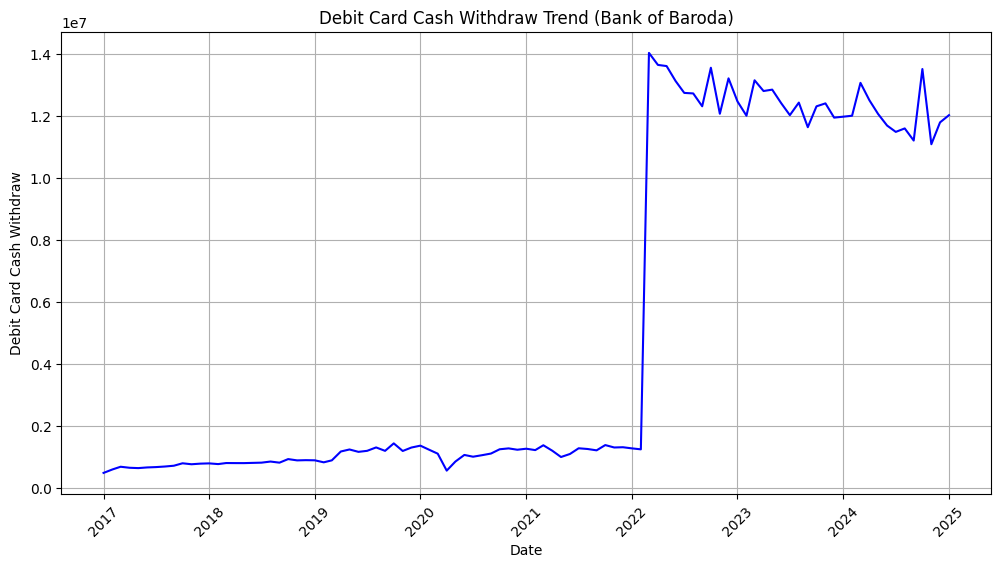

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(bobdf.index, bobdf["Debit card cash withdraw"], linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Debit Card Cash Withdraw")
plt.title("Debit Card Cash Withdraw Trend (Bank of Baroda)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

#### Lets look for Bank of India data

In [35]:
boidf = df[df["Bank Name"] == "BANK OF INDIA"]
boidf.head()

,Date,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
1,2025-01-01,BANK OF INDIA,5341.0,2895.0,2916.3,6378308.4
34,2024-12-01,BANK OF INDIA,5339.0,2897.0,5749.7,6375051.1
67,2024-11-01,BANK OF INDIA,5337.0,2898.0,5355.8,6025347.4
100,2024-10-01,BANK OF INDIA,5335.0,2900.0,5849.0,7309043.8
133,2024-09-01,BANK OF INDIA,5334.0,2900.0,5212.3,6200469.6


In [36]:
# Set "Date" as index and reverse the order
boidf.set_index("Date", inplace=True)
boidf = boidf[::-1]  # Reverse the order
boidf.head()

,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
Date,,,,,
2017-01-01,BANK OF INDIA,3483.0,4234.0,501.0,468695.0
2017-02-01,BANK OF INDIA,3483.0,4234.0,611.0,573091.0
2017-03-01,BANK OF INDIA,3483.0,4234.0,740.0,623334.0
2017-04-01,BANK OF INDIA,3487.0,4230.0,625.8,588872.8
2017-05-01,BANK OF INDIA,3483.0,4234.0,713.0,576958.0


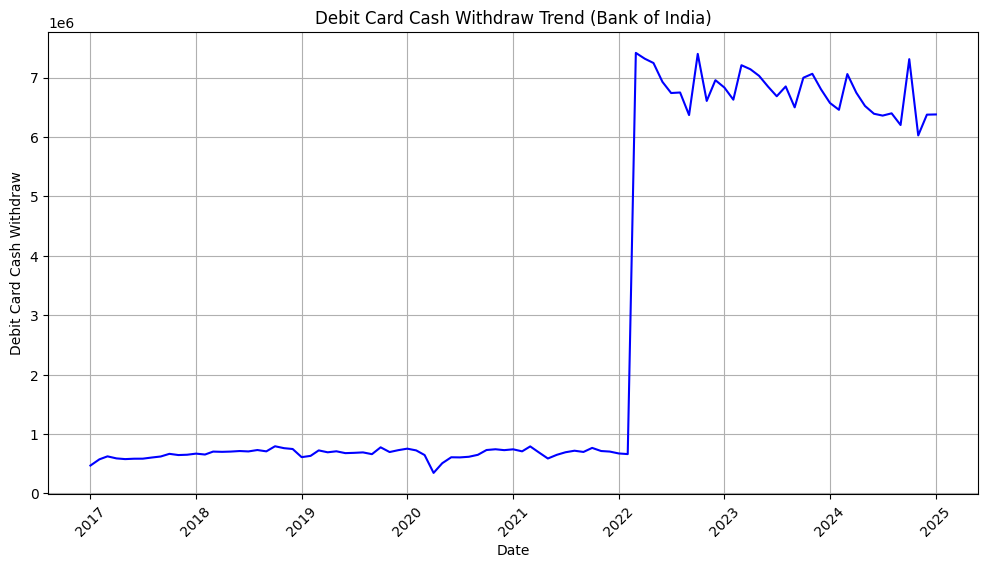

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(boidf.index, boidf["Debit card cash withdraw"], linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Debit Card Cash Withdraw")
plt.title("Debit Card Cash Withdraw Trend (Bank of India)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

#### Lets look for Canara bank data

In [38]:
cbdf = df[df["Bank Name"] == "CANARA BANK"]
cbdf.head()

,Date,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
3,2025-01-01,CANARA BANK,8174.0,3794.0,56031.2,15084342.9
36,2024-12-01,CANARA BANK,8217.0,3809.0,58175.8,14932431.4
69,2024-11-01,CANARA BANK,8272.0,3818.0,54526.8,14388855.9
102,2024-10-01,CANARA BANK,8298.0,3846.0,55759.8,16205713.9
135,2024-09-01,CANARA BANK,8312.0,3879.0,55690.3,14751049.7


In [39]:
# Set "Date" as index and reverse the order
cbdf.set_index("Date", inplace=True)
cbdf = cbdf[::-1]  # Reverse the order
cbdf.head()

,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
Date,,,,,
2017-01-01,CANARA BANK,5383.0,5039.0,991.0,501032.0
2017-02-01,CANARA BANK,5406.0,5091.0,1166.0,679375.0
2017-03-01,CANARA BANK,5391.0,5128.0,1481.0,773318.0
2017-04-01,CANARA BANK,5397.0,5142.0,1230.0,699514.3
2017-05-01,CANARA BANK,5429.0,5140.0,1626.0,712909.0


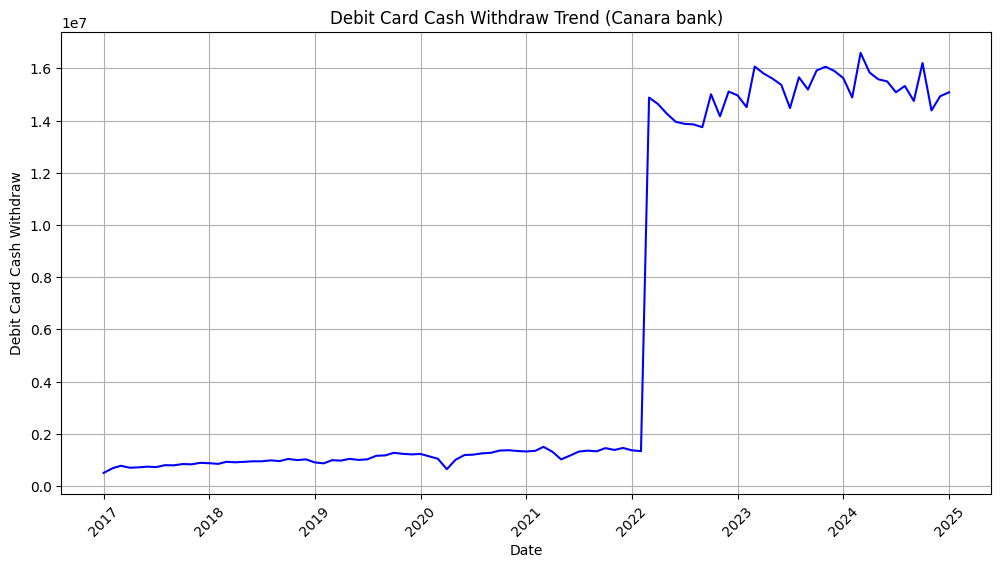

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(cbdf.index, cbdf["Debit card cash withdraw"], linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Debit Card Cash Withdraw")
plt.title("Debit Card Cash Withdraw Trend (Canara bank)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

# Issue with the debit card column values published by the RBI 

#### 1) Og values for (bank of india): 
1. Feb 2022 = 	661442.0 (value in lakhs)
2. Mar 2022 = 74143941 (Value in Rs'000)
#### after conversion we get: 
1. Feb 2022 = 661442.0 (no conversion)
2. Mar 2022 = 7414394.1 (converted by dividing og value by 10)

#### 2) Og values for (bank of Baroda) 
1. Feb 2022 = 	1260645 (value in lakhs)
2. Mar 2022 = 140457631 (value in 000's)
#### after conversion we got 
1. Feb 2022 = 1260645.0 (no conversion)
2. Mar 2022 = 14045763.1 (converted by dividing og value by 10)

#### 3) Same issue with the Canara bank along with other banks in the RBI data


# Bank of Baroda

In [41]:
bobdf = df[df["Bank Name"] == "BANK OF BARODA"]
bobdf.head()

,Date,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
0,2025-01-01,BANK OF BARODA,8504.0,2411.0,6351.0,12038033.0
33,2024-12-01,BANK OF BARODA,8395.0,2383.0,6632.7,11804846.7
66,2024-11-01,BANK OF BARODA,8345.0,2343.0,6437.0,11100178.8
99,2024-10-01,BANK OF BARODA,8217.0,2256.0,6921.4,13525513.8
132,2024-09-01,BANK OF BARODA,8107.0,2253.0,6262.9,11219026.5


In [42]:
# Further divide by 10 (total divide by 100) for Mar 2022 - Jan 2025
bobdf.loc[bobdf["Date"] >= "2022-03-01", "Debit card cash withdraw"] /= 10
bobdf.loc[bobdf["Date"] >= "2022-03-01", "Credit card cash withdraw"] /= 10

In [43]:
# Set "Date" as index and reverse the order
bobdf.set_index("Date", inplace=True)
bobdf = bobdf[::-1]  # Reverse the order
bobdf.to_csv("bobdf.csv")
bobdf.head()

,Bank Name,Atm's on-site,Atm's off-site,Credit card cash withdraw,Debit card cash withdraw
Date,,,,,
2017-01-01,BANK OF BARODA,6287.0,4146.0,167.0,500905.0
2017-02-01,BANK OF BARODA,6276.0,4203.0,227.0,613155.0
2017-03-01,BANK OF BARODA,6296.0,4224.0,255.0,699271.0
2017-04-01,BANK OF BARODA,6307.0,4212.0,222.0,666220.1
2017-05-01,BANK OF BARODA,6336.0,4216.0,217.0,655572.0


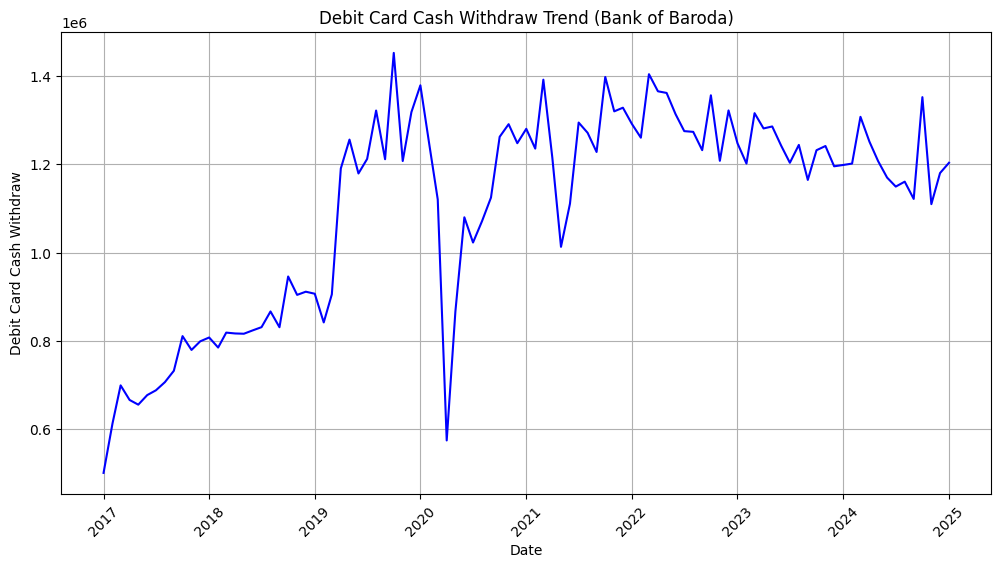

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(bobdf.index, bobdf["Debit card cash withdraw"], linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Debit Card Cash Withdraw")
plt.title("Debit Card Cash Withdraw Trend (Bank of Baroda)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

# Now since our time series seems consistent will apply different models to forecast future values